In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, roc_curve, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Kaggle/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe() 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


We have checked the dataset and, we didn't see any blank data. Some data has outliers but, they can be ignored. Why didn't we see any blank data? Because medical data don't have any blank data. Why? Because this data is the hospital's data so they can't be blank. This info gave from the patients.

In [ ]:
#show describe by box
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

**Normalization**

We did it because we need to normalize. Why? Because our data has distribution. Some features have a big value, some feature has between of 0 and 1. But they're the same distribution and for the numbers are different from each other, we need to normalize.

In [ ]:
for i in df.columns:
    for each in df[i].values: 
      #normalize to 0 ~ 1
        if each > 1 or each < -1:
            df[i] = (df[i] - np.min(df[i]))/(np.max(df[i]) - np.min(df[i]))
        else:
            pass

**Determine X and Y (Train-test split)**

In [ ]:
y = df["target"].values
x = df.drop(["target"],axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

**Machine Learning (Classification)**

1. Logistic Regression (O)

2. KNN(K Neighbors) (O)

3. Decision Tree

4. Random Forests

5. SVM

6. GBM (Gradient Boosting Machine)

7. AdaBoost

8. Bagging

**Logistic Regression**

In [ ]:
lr = LogisticRegression(random_state = 42).fit(x_train,y_train)
lr.score(x_test,y_test)

0.8524590163934426

In [ ]:
# GridSearchCV
params = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
lr_model = LogisticRegression(random_state = 42)
lr_cv = GridSearchCV(lr_model,params,cv = 3).fit(x_train,y_train)
lr_cv.best_params_

{'C': 1.0, 'penalty': 'l2'}

In [ ]:
lr_tuned = LogisticRegression(C = 1,random_state = 42).fit(x_train,y_train)
lr_tuned.score(x_test,y_test)

0.8524590163934426

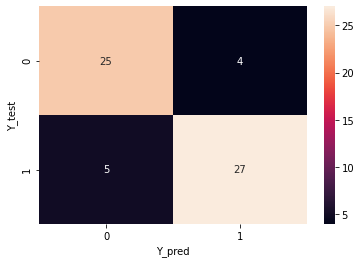

In [ ]:
y_pred_log = lr_tuned.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred_log),annot = True)
plt.xlabel("Y_pred")
plt.ylabel("Y_test")
plt.show()

**KNN**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2).fit(x_train,y_train)
knn.score(x_test,y_test)

0.7377049180327869

In [ ]:
params = {"n_neighbors": range(1,50)}
knn_model = KNeighborsClassifier()
knn_cv = GridSearchCV(knn_model, params, cv = 10, n_jobs = -1).fit(x_train,y_train)
knn_cv.best_params_

{'n_neighbors': 7}

In [ ]:
knn_tuned = KNeighborsClassifier(n_neighbors = 7).fit(x_train,y_train)
knn_tuned.score(x_test,y_test)

0.819672131147541

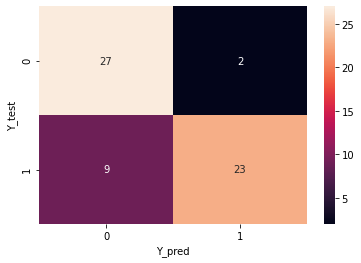

In [ ]:
y_pred_knn = knn_tuned.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot = True)
plt.xlabel("Y_pred")
plt.ylabel("Y_test")
plt.show()